In [ ]:
""" 
INSTRUÇÕES:
objetivo geral: criar uma rede neural para classificação de imagens do dataset 
fashion mnist e exploração de todas as características da rede neural, uma por vez.

O melhor resultado de cada questão/etapa é utilizado nas próximas 
QUESTÃO 01: exploração inicial 
    Dataset fashion mnist
    função de ativação
    5 testes com inicialização aleatória: diferenças de convergencia, estabilidade e desempenho
    dataset de treino
    métricas: medida de desempenho(accuracy), função de perda (entropia cruzada/loss), curva de convergência
    otimizador: Adam
    arquitetura: quantas camadas e neurônios por camada
    funcoes de ativação: ReLU, Sigmoid ou Tanh
    quantas épocas
    taxa de aprendizado
    indícios de under/overfitting

QUESTÃO 02: exploração de hiperparâmetros
    taxa de aprendizado x termo momento x velocidade de convergência
    Grid search para encontrar a melhor combinação: erro de treinamento x taxa de aprendizado x momento
    taxa de aprendizado menor e momento intermediário
    dataset de treino e (opcionalmente) dataset de validação
    métricas: função de perda, velocidade de convergência, curva de convergência e (opcional) estabilidade
    critério de parada 
    combinação com melhor equilíbrio entre velocidadee estabilidade
    tendências observadas(ex: maior taxa de aprendizado leva a maior velocidade, mas menor estabilidade)

QUESTÃO 03: topologia de rede neural
    dataset de treino e (opcionalmente) dataset de validação
    impacto do número de camadas ocultas e neurônios por camada e teste de variação desses números
    métricas: função de perda, curva de convergência(under e overfitting), tempo de treinamento, generalização(medida F), precisão, revocação
    gráfico de perda mostrando diferença entre topologias
    
QUESTÃO 04: qualidade dos dados
    influência do número e qualidade dos dados, ruído, etc sobre a capacidade de generalização
    dividir o dataset em subsets de acordo com o rótulo -> manter proporcionalidade
    faixas do dataset: 10%, 30%, 50%, 70%, 100%
    métrica: função de perda, acurácia, 
    identificar saturação no aprendizado
    curvas de generalização: tamanho do conjunto X desempenho
    tempo de treinamento e custo computacional
    Estratégia de amostragem(estratificada, aleatória ou outra)

QUESTÃO 05:
    escolher 4 melhores modelos e usar modelo de testes neles
    treinamento como referência comparativa
    ajustes de otimização
    métricas: perda(entropia cruzada categórica), acurácia, curva de validação(treinamento x teste), F1 score, precisão, revocação
    escolha da configuração final do modelo

QUESTÃO 06: validação cruzada k-fold
    divisão do dataset em k-subconjuntos e teste em todos eles
    métricas: média de todas as partições de perda: acurácia e F1. 
    para cada partição: curvas de validação e variância(dispersão) dos resultados 
    justificativa do tamanho de k
    identificação de flutuações
"""

# Passo inicial: carregar e visualizar o Fashion-MNIST
- Objetivo: confirmar acesso ao dataset e entender suas classes.
- A seguir: carregamos via `tensorflow.keras.datasets.fashion_mnist` e mostramos algumas imagens com seus rótulos.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 1us/step
Treino: (60000, 28, 28), Teste: (10000, 28, 28)
Exemplo de rótulos (0-9): ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Treino: (60000, 28, 28), Teste: (10000, 28, 28)
Exemplo de rótulos (0-9): ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


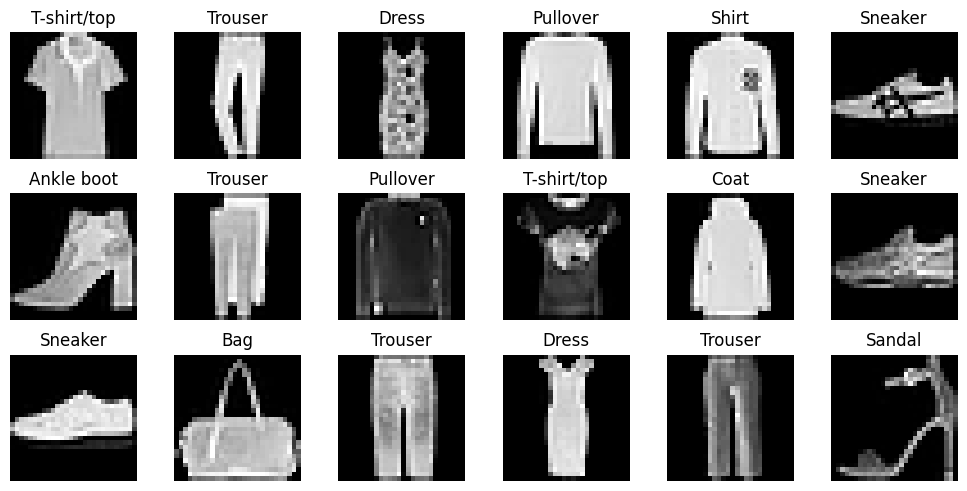

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

labels = [
    "T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"
]

print(f"Treino: {x_train.shape}, Teste: {x_test.shape}")
print("Exemplo de rótulos (0-9):", labels)

# Normalização (0-1) para visualização e futura modelagem
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

# Grid de amostras
fig, axes = plt.subplots(3, 6, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    idx = np.random.randint(0, len(x_train))
    ax.imshow(x_train[idx], cmap="gray")
    ax.set_title(labels[y_train[idx]])
    ax.axis("off")
plt.tight_layout()
plt.show()

## Próximos passos para a Questão 01
- Definir arquitetura inicial (camadas/neurônios).
- Escolher função de ativação (ReLU, Sigmoid ou Tanh).
- Otimizador: `Adam`, métricas: acurácia e perda (entropia cruzada).
- Executar 5 treinos com inicialização aleatória e comparar convergência/estabilidade/desempenho.